#### Cargamos el dataset y normalizamos las columnas

In [42]:
import pandas as pd
import numpy as np

# Cargar el dataset
file_path = './data/MP_Dataset_KMeans.xlsx'
df = pd.read_excel(file_path)

# Seleccionar columnas relevantes
columns_per = [col for col in df.columns if col.startswith('per')]
columns_relevant = ['agno', 'countryname'] + columns_per
df = df[columns_relevant]

# Validar si las variables `per` suman 1
df['per_sum'] = df[columns_per].sum(axis=1)
rows_to_normalize = df['per_sum'] != 1.0

# Normalizar las filas que no suman 1
df.loc[rows_to_normalize, columns_per] = df.loc[rows_to_normalize, columns_per].div(df.loc[rows_to_normalize, 'per_sum'], axis=0)
df.drop(columns=['per_sum'], inplace=True)

# Verificar la normalización
print(f"¿Todas las filas normalizadas correctamente? {df[columns_per].sum(axis=1).round(6).eq(1).all()}")


¿Todas las filas normalizadas correctamente? True


In [43]:
from sklearn.preprocessing import StandardScaler

# Extraer únicamente las columnas de interés (las columnas 'per')
data_per = df[columns_per]

# Normalizar las columnas 'per'
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_per)

# Convertir a DataFrame para mantener las etiquetas de las columnas
data_normalized = pd.DataFrame(data_normalized, columns=columns_per)

# Verificar la estructura del DataFrame normalizado
print(data_normalized.head())


     per101    per102    per103    per104    per105    per106    per107  \
0  0.497840 -0.396732 -0.388033  0.759010 -0.572992 -0.604434  0.815823   
1  0.862408 -0.396732 -0.431594  0.605838 -0.560328 -0.610051  0.883250   
2 -0.546710 -0.396732  5.143085 -0.629178  0.262772 -0.429470  0.311931   
3 -0.514866 -0.373232 -0.257470 -0.429146 -0.505585  0.022430 -0.182974   
4 -0.445319 -0.396732  0.289988 -0.588379 -0.572983 -0.259830  0.637130   

     per108    per109    per110  ...    per605    per606    per607    per608  \
0  0.069599 -0.485259 -0.453143  ...  1.692985 -0.552428 -0.581686 -0.371947   
1  0.331504 -0.485259 -0.453143  ...  1.167526 -0.627667 -0.611310 -0.371947   
2 -0.800334 -0.485259 -0.453143  ... -0.495731  2.746877 -0.399189 -0.371947   
3  0.340845 -0.485259 -0.453143  ... -0.760528  0.037377 -0.399339 -0.371947   
4  0.775440 -0.485259 -0.453143  ...  0.667825  0.304546  0.021048 -0.371947   

     per701    per702    per703    per704    per705    per706  
0 -0

#### PCA

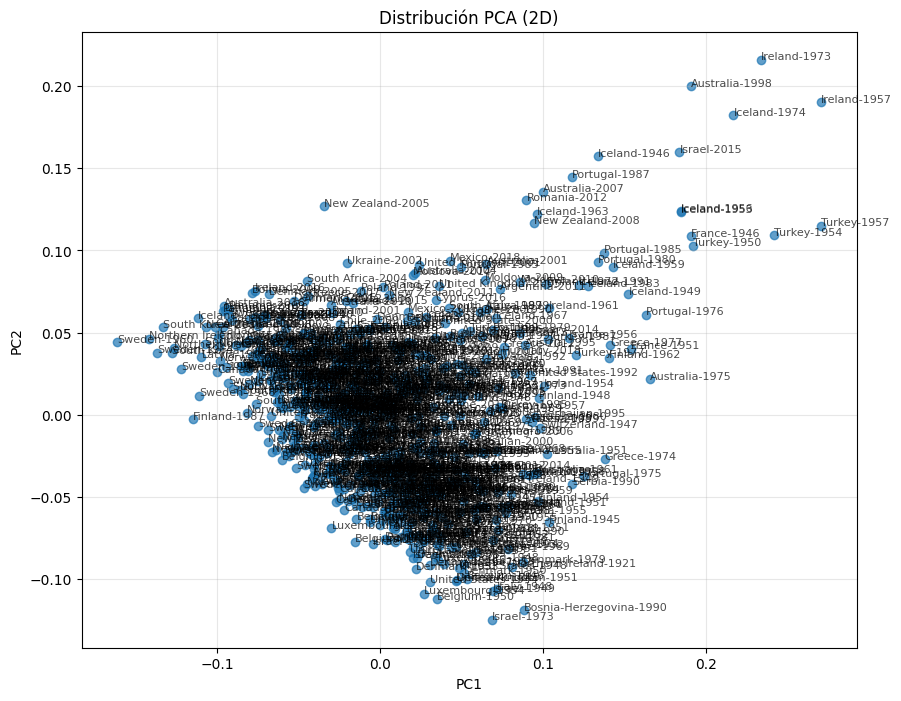

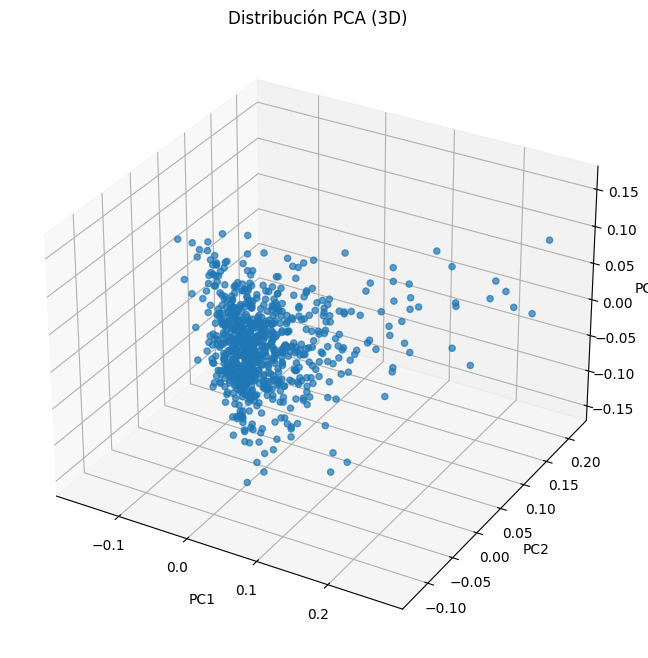

In [44]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Realizar PCA
pca = PCA(n_components=3)
components = pca.fit_transform(df[columns_per])
df_pca = pd.DataFrame(components, columns=['PC1', 'PC2', 'PC3'])
df_pca['countryname'] = df['countryname']
df_pca['agno'] = df['agno']

# Gráfico 2D
plt.figure(figsize=(10, 8))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.7)
for i, row in df_pca.iterrows():
    plt.text(row['PC1'], row['PC2'], f"{row['countryname']}-{row['agno']}", fontsize=8, alpha=0.7)
plt.title('Distribución PCA (2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(alpha=0.3)
plt.show()

# Gráfico 3D (opcional)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], alpha=0.7)
ax.set_title('Distribución PCA (3D)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()


In [45]:
max_k = 10  # Ajusta según el rango deseado


In [46]:
wcss = []  # Lista para almacenar los WCSS
for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_normalized)  # Asegúrate de usar los datos normalizados
    wcss.append(kmeans.inertia_)  # Inercia es el WCSS


/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/

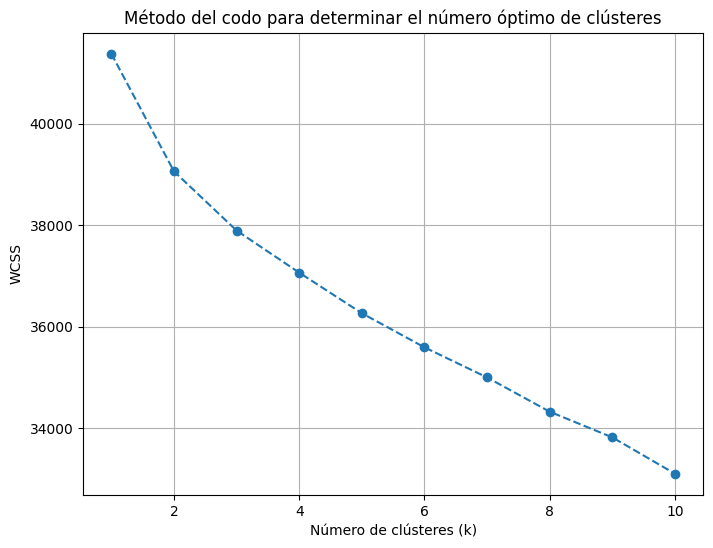

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(1, max_k + 1), wcss, marker='o', linestyle='--')
plt.title('Método del codo para determinar el número óptimo de clústeres')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('WCSS')
plt.grid()
plt.show()


#### Estimamos un # de clusters inicial con el 'elbow method'
* suma de valores cuadráticos dentro del cluster (WCSS)

In [48]:
from kneed import KneeLocator

# Verificar consistencia de max_k y wcss
print(f"max_k: {max_k}, longitud de wcss: {len(wcss)}")
assert len(wcss) == max_k, "Las longitudes de wcss y el rango no coinciden."

# Encontrar el codo automáticamente
kl = KneeLocator(range(1, max_k + 1), wcss, curve="convex", direction="decreasing")
optimal_k = kl.knee
print(f"El número óptimo de clústeres según el método del codo es: {optimal_k}")


max_k: 10, longitud de wcss: 10
El número óptimo de clústeres según el método del codo es: 3


#### Aplicar K-Means y Visualizar Resultados

/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


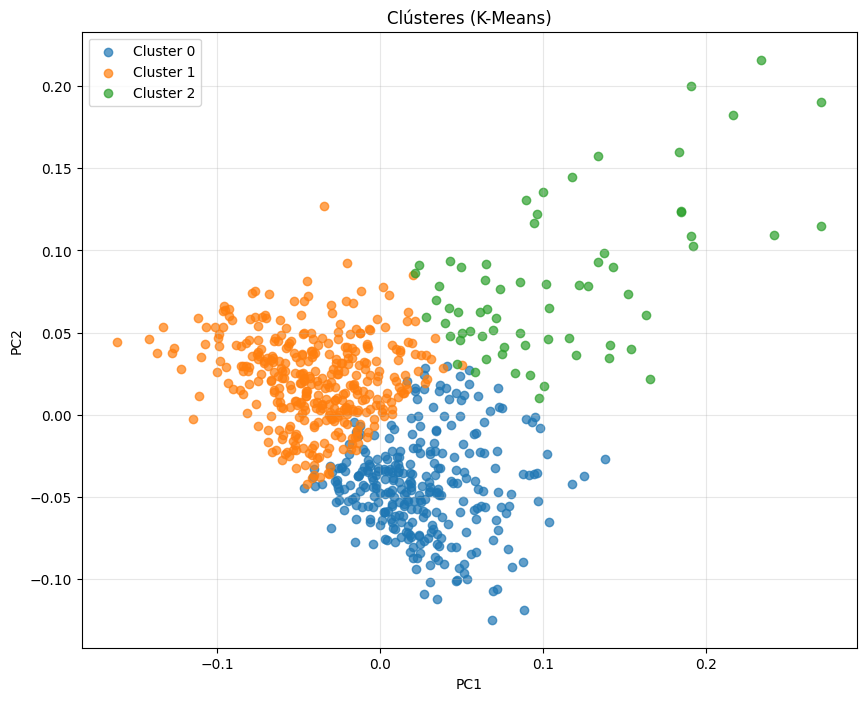

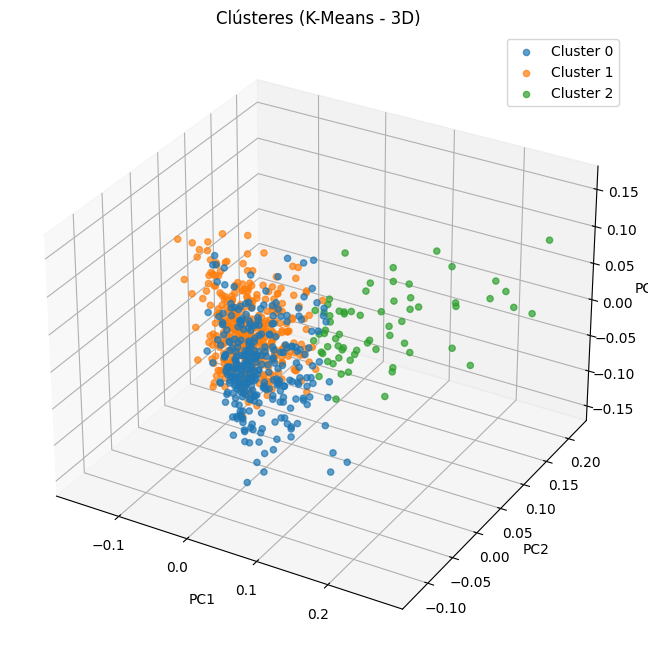

In [49]:
# Seleccionar el número óptimo de clústeres (basado en el método del codo)
# optimal_k = 4  # Cambiar según el gráfico del codo

# Aplicar K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(df[columns_per])

# Combinar los resultados de PCA con los clústeres
df_pca['cluster'] = df['cluster']

# Visualizar los clústeres en 2D
plt.figure(figsize=(10, 8))
for cluster in range(optimal_k):
    cluster_data = df_pca[df_pca['cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', alpha=0.7)

plt.title('Clústeres (K-Means)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# (Opcional) Gráfico 3D con colores por clúster
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for cluster in range(optimal_k):
    cluster_data = df_pca[df_pca['cluster'] == cluster]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'], label=f'Cluster {cluster}', alpha=0.7)
ax.set_title('Clústeres (K-Means - 3D)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend()
plt.show()


#### Analicemos los países-año de los programas en cada cluster

In [54]:
# Crear un nuevo DataFrame para los resultados agrupados por clúster
clustered_data = df[['countryname', 'agno', 'cluster']]

# Agrupar por clúster y analizar
for cluster in range(optimal_k):
    print(f"\nCluster {cluster}:")
    cluster_data = clustered_data[clustered_data['cluster'] == cluster]
    
    # Países y años únicos
    unique_countries = cluster_data['countryname'].unique()
    unique_years = cluster_data['agno'].unique()
    
    # Número de programas
    num_programs = len(cluster_data)
    num_countries = len(unique_countries)
    num_years = len(unique_years)
    
    # Mostrar resultados
    print(f"Número de programas: {num_programs}")
    print(f"Países ({num_countries}): {', '.join(unique_countries)}")
    print(f"Años ({num_years}): {', '.join(map(str, sorted(unique_years)))}")
    print("Programas (País-Año):")
    display(cluster_data[['countryname', 'agno']].reset_index(drop=True))



Cluster 0:
Número de programas: 303
Países (50): Albania, Argentina, Armenia, Australia, Austria, Azerbaijan, Belarus, Belgium, Bosnia-Herzegovina, Bulgaria, Canada, Chile, Czech Republic, Denmark, Ecuador, Finland, France, Georgia, Germany, Greece, Hungary, Iceland, Ireland, Israel, Italy, Japan, Latvia, Luxembourg, Mexico, Moldova, Montenegro, Netherlands, New Zealand, North Macedonia, Northern Ireland, Norway, Poland, Portugal, Romania, Russia, Serbia, Slovakia, Spain, Sri Lanka, Sweden, Switzerland, Turkey, Ukraine, United Kingdom, United States
Años (80): 1920, 1921, 1924, 1928, 1929, 1932, 1936, 1938, 1940, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2005, 2006, 2007, 

,countryname,agno
0,Albania,1997
1,Albania,2001
2,Argentina,1989
3,Armenia,1995
4,Armenia,1999
...,...,...
298,United States,1988
299,United States,2008
300,United States,2012
301,United States,2016



Cluster 1:
Número de programas: 369
Países (60): Argentina, Armenia, Australia, Austria, Belgium, Bolivia, Bosnia-Herzegovina, Brazil, Bulgaria, Canada, Chile, Colombia, Costa Rica, Croatia, Cyprus, Czech Republic, Denmark, Dominican Republic, Estonia, Finland, France, Georgia, Germany, Greece, Hungary, Iceland, Ireland, Italy, Japan, Latvia, Lithuania, Luxembourg, Malta, Mexico, Moldova, Montenegro, Netherlands, New Zealand, North Macedonia, Northern Ireland, Norway, Panama, Peru, Poland, Portugal, Romania, Russia, Serbia, Slovakia, Slovenia, South Africa, South Korea, Spain, Sweden, Switzerland, Turkey, Ukraine, United Kingdom, United States, Uruguay
Años (72): 1925, 1933, 1945, 1949, 1951, 1952, 1953, 1954, 1956, 1957, 1958, 1960, 1961, 1963, 1964, 1965, 1966, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 200

,countryname,agno
0,Argentina,1995
1,Argentina,1999
2,Argentina,2003
3,Argentina,2007
4,Argentina,2015
...,...,...
364,United Kingdom,2017
365,United Kingdom,2019
366,United States,1996
367,United States,2004



Cluster 2:
Número de programas: 67
Países (25): Argentina, Australia, Austria, Cyprus, Denmark, Finland, France, Greece, Hungary, Iceland, Ireland, Israel, Italy, Mexico, Moldova, New Zealand, Portugal, Romania, Russia, Slovenia, South Africa, Turkey, Ukraine, United Kingdom, United States
Años (51): 1946, 1948, 1949, 1950, 1951, 1953, 1954, 1956, 1957, 1959, 1961, 1962, 1963, 1967, 1972, 1973, 1974, 1975, 1976, 1977, 1979, 1980, 1983, 1985, 1987, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1998, 1999, 2000, 2001, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018
Programas (País-Año):


,countryname,agno
0,Argentina,2011
1,Argentina,2013
2,Australia,1975
3,Australia,1996
4,Australia,1998
...,...,...
62,Ukraine,2006
63,United Kingdom,2001
64,United Kingdom,2005
65,United States,1992


#### Revisemos centroides de los clusters

In [52]:
# Revisar los centroides
centroids = kmeans.cluster_centers_  # Centroides de los clústeres
centroids_df = pd.DataFrame(centroids, columns=columns_per)  # Crear un DataFrame para los centroides

# Redondear los valores para mejor visualización
centroids_df = centroids_df.round(4)

# Agregar un identificador para los clústeres
centroids_df.index = [f"Cluster {i}" for i in range(optimal_k)]

# Mostrar los centroides
print("Centroides de los Clústeres:")
display(centroids_df)


Centroides de los Clústeres:


,per101,per102,per103,per104,per105,per106,per107,per108,per109,per110,...,per605,per606,per607,per608,per701,per702,per703,per704,per705,per706
Cluster 0,0.0165,0.0050,0.0055,0.0229,0.0083,0.0179,0.0262,0.0090,0.0047,0.0015,...,0.0147,0.0233,0.0116,0.0034,0.0332,0.0020,0.0479,0.0137,0.0098,0.0424
Cluster 1,0.0066,0.0019,0.0015,0.0161,0.0037,0.0059,0.0232,0.0148,0.0021,0.0030,...,0.0395,0.0153,0.0082,0.0038,0.0292,0.0011,0.0342,0.0047,0.0072,0.0255
Cluster 2,0.0070,0.0047,0.0065,0.0110,0.0055,0.0062,0.0152,0.0087,0.0066,0.0026,...,0.0187,0.0252,0.0045,0.0009,0.0332,0.0022,0.0414,0.0074,0.0069,0.0223


#### Analicemos los Países y Períodos en Cada Clúster

In [ ]:
cluster_data